In [1]:
## check availability of GPU (nvidia-smi)
import os
os.environ["CUDA_VISIBLE_DEVICES"]="4"

In [2]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: Tesla V100-SXM2-32GB, compute capability 7.0


In [3]:
import warnings
warnings.filterwarnings("ignore")

import os 
import glob

current_dir = "/mnt/akoustos/"

data_dir = current_dir + "Data/"
labeled_data_dir = data_dir + 'Labeled_Data/'
audio_dir = data_dir + "Raw_Audio/"

spectrogram_dir = data_dir + "Extracted_Spectrogram/"
if not os.path.exists(spectrogram_dir):
    os.makedirs(spectrogram_dir)


In [4]:
from src.data_split import Data_Split
categories = ['25']  ## regard the remaining labeled detections with other labels as "non-category" (i.e., negatives)
data = Data_Split.data_split(categories, spectrogram_dir, include_no_label_category = True)
print(data.head(10))

   label  Count  Percentage
0      0   2248        81.8
1      1    500        18.2
Size of train, val, test dataset: 1922 413 413
Percentage of train, val, test dataset: 69.9% 15.0% 15.0%
                                            filename  label  split
0  /mnt/akoustos/Data/Extracted_Spectrogram/proje...      0  train
1  /mnt/akoustos/Data/Extracted_Spectrogram/proje...      0  train
2  /mnt/akoustos/Data/Extracted_Spectrogram/proje...      1    val
3  /mnt/akoustos/Data/Extracted_Spectrogram/proje...      1  train
4  /mnt/akoustos/Data/Extracted_Spectrogram/proje...      1   test
5  /mnt/akoustos/Data/Extracted_Spectrogram/proje...      0  train
6  /mnt/akoustos/Data/Extracted_Spectrogram/proje...      1   test
7  /mnt/akoustos/Data/Extracted_Spectrogram/proje...      0  train
8  /mnt/akoustos/Data/Extracted_Spectrogram/proje...      0  train
9  /mnt/akoustos/Data/Extracted_Spectrogram/proje...      1    val


### Train with a Customized CNN 


Please choose one model from the available models: Customized_CNN, Resnet18, Resnet34, Resnet50, Resnet101, Resnet152, Alexnet, VGG11, VGG13, VGG16, VGG19, Densenet121, Densenet169, Densenet201, Squeezenet1_0.
Begin training.
Epoch 01: | Train Loss: 67.25437 | Val Loss: 14.80833 | Train Acc: 0.700| Val Acc: 0.232
Epoch 02: | Train Loss: 34.06571 | Val Loss: 16.45915 | Train Acc: 0.718| Val Acc: 0.814
Epoch 03: | Train Loss: 14.01140 | Val Loss: 9.61170 | Train Acc: 0.755| Val Acc: 0.850
Epoch 04: | Train Loss: 5.72715 | Val Loss: 3.49096 | Train Acc: 0.836| Val Acc: 0.881
Epoch 05: | Train Loss: 3.74869 | Val Loss: 2.91799 | Train Acc: 0.853| Val Acc: 0.901
Epoch 06: | Train Loss: 5.42965 | Val Loss: 3.71181 | Train Acc: 0.843| Val Acc: 0.896
Epoch 07: | Train Loss: 1.91586 | Val Loss: 27.05210 | Train Acc: 0.873| Val Acc: 0.230
Epoch 08: | Train Loss: 4.24319 | Val Loss: 0.59319 | Train Acc: 0.840| Val Acc: 0.915
Epoch 09: | Train Loss: 1.02082 | Val Loss: 0.53112 | Train Acc: 0.895|

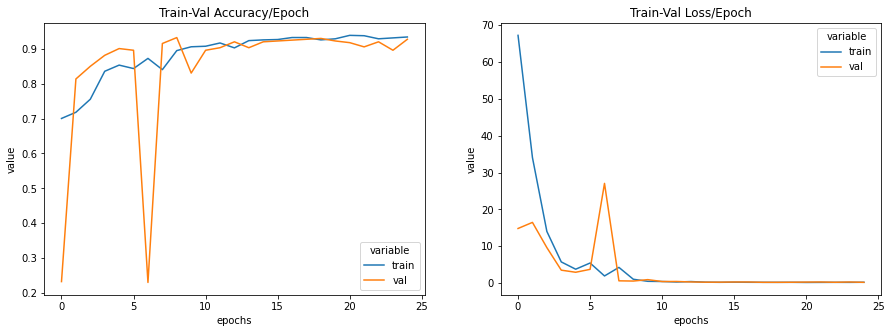

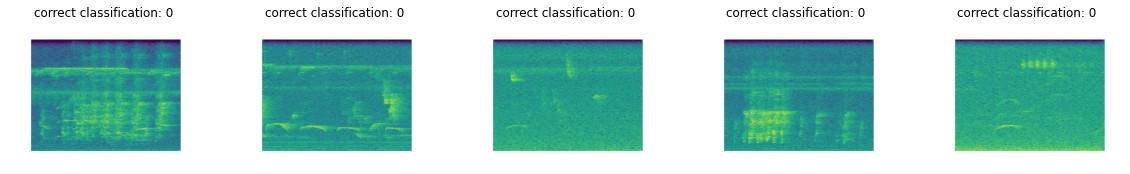

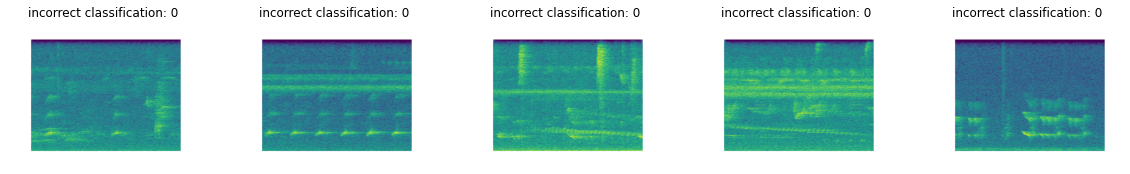

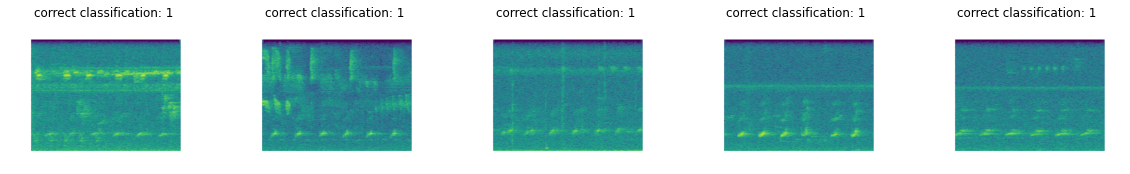

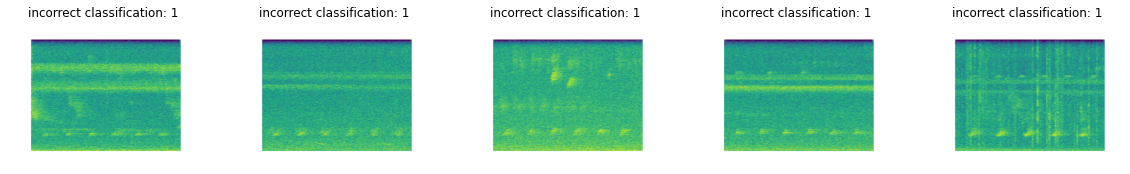

In [5]:
from src.model.binary_classification import binary_classification_models
model = binary_classification_models.train_model(data = data, 
                                                 model_name = 'Customized_CNN', 
                                                 batch_size = 32,  
                                                 optimizer = 'Adam', 
                                                 learning_rate = 0.008, 
                                                 lr_decay = False, 
                                                 num_epochs = 25)


### Fine-tune a pre-trained model


Please choose one model from the available models: Customized_CNN, Resnet18, Resnet34, Resnet50, Resnet101, Resnet152, Alexnet, VGG11, VGG13, VGG16, VGG19, Densenet121, Densenet169, Densenet201, Squeezenet1_0.
Begin training.
Epoch 01: | Train Loss: 0.71970 | Val Loss: 0.11445 | Train Acc: 0.899| Val Acc: 0.969
Epoch 02: | Train Loss: 0.19517 | Val Loss: 0.08162 | Train Acc: 0.954| Val Acc: 0.976
Epoch 03: | Train Loss: 0.19457 | Val Loss: 0.09941 | Train Acc: 0.955| Val Acc: 0.969
Epoch 04: | Train Loss: 0.26931 | Val Loss: 0.16421 | Train Acc: 0.945| Val Acc: 0.959
Epoch 05: | Train Loss: 0.20847 | Val Loss: 0.13188 | Train Acc: 0.954| Val Acc: 0.964
Epoch 06: | Train Loss: 0.22719 | Val Loss: 0.10556 | Train Acc: 0.952| Val Acc: 0.969
Epoch 07: | Train Loss: 0.18608 | Val Loss: 0.11803 | Train Acc: 0.959| Val Acc: 0.969
Epoch 08: | Train Loss: 0.20349 | Val Loss: 0.12593 | Train Acc: 0.953| Val Acc: 0.969
Epoch 09: | Train Loss: 0.20990 | Val Loss: 0.10461 | Train Acc: 0.955| Val A

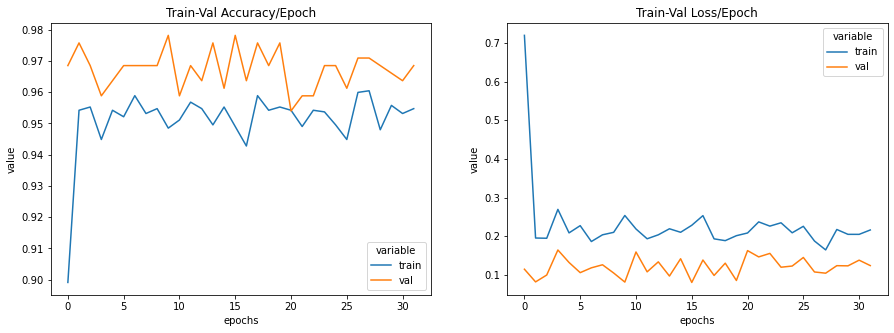

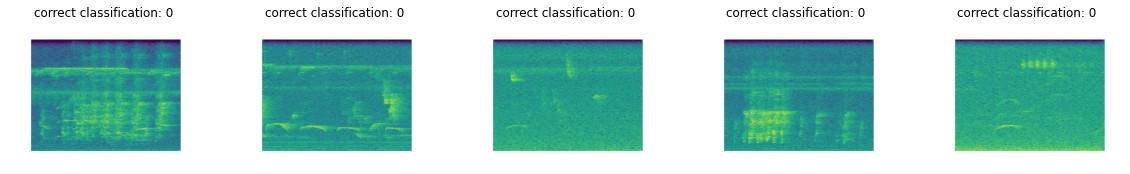

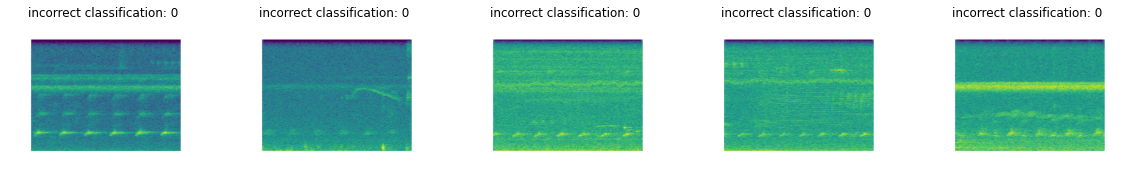

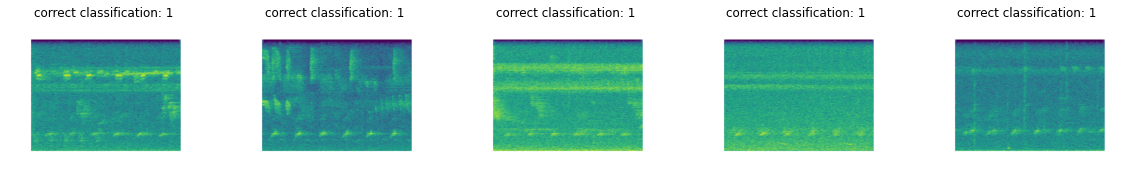

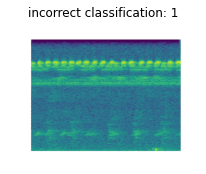

In [8]:
from src.model.binary_classification import binary_classification_models
model = binary_classification_models.train_model(data = data, 
                                                 model_name = 'Resnet50', 
                                                 batch_size = 32, 
                                                 pretrained = True, 
                                                 optimizer = 'Adam', 
                                                 learning_rate = 0.0005, 
                                                 lr_decay = True, 
                                                 num_epochs = 32)